### Classification approach using game_team_stats.csv file

In [65]:
import pandas as pd

In [66]:
path='/Users/acram/Downloads/archive/game_teams_stats.csv'
game_teams=pd.read_csv(path)

In [67]:
game_teams = game_teams.sort_values(by=['game_id'], ascending=True)
game_teams.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
36857,2000020001,21,away,False,OT,Bob Hartley,2.0,28.0,NaN,20.0,10.0,1.0,NaN,NaN,NaN,NaN,left
36858,2000020001,25,home,False,OT,Ken Hitchcock,2.0,21.0,NaN,22.0,9.0,1.0,NaN,NaN,NaN,NaN,left
38303,2000020002,9,away,False,OT,Jacques Martin,4.0,33.0,NaN,20.0,6.0,2.0,NaN,NaN,NaN,NaN,right
38304,2000020002,6,home,False,OT,Pat Burns,4.0,38.0,NaN,12.0,10.0,2.0,NaN,NaN,NaN,NaN,right
36159,2000020003,7,home,True,REG,Lindy Ruff,4.0,30.0,NaN,21.0,3.0,0.0,NaN,NaN,NaN,NaN,right


In [68]:
game_teams.tail()
game_teams.dropna(inplace=True)

#did head and tail to check if it is completely NaN in all the columns 

In [69]:

from sklearn.preprocessing import OneHotEncoder

game_teams['outcome'] = game_teams['won'].apply(lambda x: 1 if x==True else 0)
##If a team  wins it becomes  1
game_teams=game_teams.drop(['head_coach'],axis=1)
##Dropping head coach as issues involved during encoding
# One-Hot Encode categorical columns
one_hot_cols = ['HoA', 'settled_in','startRinkSide']
one_hot = OneHotEncoder()
one_hot_df = pd.DataFrame(one_hot.fit_transform(game_teams[one_hot_cols]).toarray(), columns=one_hot.get_feature_names_out(one_hot_cols))
game_teams = game_teams.drop(one_hot_cols, axis=1).join(one_hot_df)

# Drop null values
game_teams.dropna(inplace=True)

# Plot correlation heatmap
correlation_matrix = game_teams.corr()



In [70]:
correlation_matrix

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,outcome,HoA_away,HoA_home,settled_in_OT,settled_in_REG,startRinkSide_left,startRinkSide_right
game_id,1.000000e+00,0.071896,2.187489e-15,0.028292,0.062671,-0.043400,-0.148442,-0.104690,-0.009389,7.866460e-17,0.091237,-0.012601,0.021022,2.187489e-15,0.000148,-0.000148,0.010171,-0.010171,0.015759,-0.015759
team_id,7.189648e-02,1.000000,-9.371376e-03,-0.011252,-0.023656,-0.005505,-0.006923,-0.004849,-0.010946,2.036029e-02,-0.021814,-0.038657,0.008244,-9.371376e-03,0.010679,-0.010679,0.001646,-0.001646,-0.005402,0.005402
won,2.187489e-15,-0.009371,1.000000e+00,0.591057,0.006509,-0.068361,-0.034093,0.019924,0.228842,3.463217e-02,-0.009967,0.106594,0.198624,1.000000e+00,-0.000109,0.000109,-0.001665,0.001665,0.003949,-0.003949
goals,2.829215e-02,-0.011252,5.910566e-01,1.000000,0.132968,-0.088985,0.044670,0.100863,0.440500,3.739888e-02,0.006623,0.106848,0.113418,5.910566e-01,-0.004084,0.004084,0.007033,-0.007033,0.003831,-0.003831
shots,6.267057e-02,-0.023656,6.509072e-03,0.132968,1.000000,-0.015399,-0.037550,0.171814,0.089784,1.358087e-01,0.037344,0.092599,-0.146343,6.509072e-03,0.002534,-0.002534,0.003327,-0.003327,-0.007638,0.007638
hits,-4.339980e-02,-0.005505,-6.836057e-02,-0.088985,-0.015399,1.000000,0.035671,-0.092930,-0.041984,-4.836321e-03,0.102817,0.019803,0.077687,-6.836057e-02,-0.003566,0.003566,0.003128,-0.003128,-0.000719,0.000719
pim,-1.484422e-01,-0.006923,-3.409306e-02,0.044670,-0.037550,0.035671,1.000000,0.221033,0.103554,-1.469623e-02,-0.063229,-0.052602,-0.003990,-3.409306e-02,0.005963,-0.005963,0.012132,-0.012132,-0.006911,0.006911
powerPlayOpportunities,-1.046896e-01,-0.004849,1.992396e-02,0.100863,0.171814,-0.092930,0.221033,1.000000,0.393072,3.729938e-02,0.014952,-0.031219,-0.114038,1.992396e-02,0.009433,-0.009433,0.009851,-0.009851,-0.009606,0.009606
powerPlayGoals,-9.389377e-03,-0.010946,2.288421e-01,0.440500,0.089784,-0.041984,0.103554,0.393072,1.000000,2.383427e-02,0.005668,0.033429,0.037074,2.288421e-01,-0.004876,0.004876,0.016513,-0.016513,-0.002097,0.002097
faceOffWinPercentage,7.866460e-17,0.020360,3.463217e-02,0.037399,0.135809,-0.004836,-0.014696,0.037299,0.023834,1.000000e+00,0.060412,0.057517,-0.101394,3.463217e-02,-0.010080,0.010080,0.018118,-0.018118,0.000441,-0.000441


In [71]:
X=game_teams.drop(['outcome'],axis=1)
Y=game_teams['outcome']

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [72]:
X_train

,game_id,team_id,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,HoA_away,HoA_home,settled_in_OT,settled_in_REG,startRinkSide_left,startRinkSide_right
14120,2011021039,1,False,0.0,17.0,38.0,14.0,5.0,0.0,42.4,10.0,5.0,9.0,0.0,1.0,0.0,1.0,0.0,1.0
10659,2013021072,24,True,6.0,40.0,15.0,2.0,3.0,1.0,56.5,13.0,4.0,9.0,0.0,1.0,0.0,1.0,1.0,0.0
18510,2011020638,52,False,0.0,24.0,19.0,6.0,2.0,0.0,34.5,7.0,6.0,12.0,1.0,0.0,0.0,1.0,1.0,0.0
17979,2011020079,52,False,3.0,29.0,27.0,8.0,4.0,2.0,37.0,10.0,10.0,15.0,0.0,1.0,1.0,0.0,1.0,0.0
6519,2016021091,1,False,2.0,32.0,40.0,13.0,4.0,1.0,40.7,10.0,8.0,13.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,2015020191,21,False,2.0,28.0,21.0,12.0,5.0,0.0,56.7,6.0,4.0,10.0,0.0,1.0,0.0,1.0,1.0,0.0
482,2015020531,52,True,1.0,28.0,25.0,4.0,2.0,0.0,42.3,5.0,6.0,18.0,0.0,1.0,0.0,1.0,0.0,1.0
13646,2012020374,24,True,4.0,22.0,25.0,6.0,7.0,1.0,47.8,6.0,4.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0
16803,2010020461,27,False,3.0,33.0,26.0,10.0,4.0,2.0,51.4,4.0,7.0,9.0,0.0,1.0,0.0,1.0,0.0,1.0


In [73]:
### Classifier showdown
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 48.5053%
Log Loss: 1.668178260333687


/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


SVC
****Results****
Accuracy: 49.6537%
Log Loss: 0.6931471805599454


/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


NuSVC
****Results****
Accuracy: 49.2162%
Log Loss: 0.6933180529317373
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 2.2204460492503136e-16


/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


RandomForestClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 0.01726162979292693
AdaBoostClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 2.2204460492503136e-16


/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


GradientBoostingClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 2.190238246033767e-05
GaussianNB
****Results****
Accuracy: 57.3460%
Log Loss: 0.6926786827325035
LinearDiscriminantAnalysis
****Results****
Accuracy: 78.1991%
Log Loss: 0.4555638278627904
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 100.0000%
Log Loss: 2.2204460492503136e-16


/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/Users/acram/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/var/folders/hd/2q_7svg54p3910vn3jv37pr00000gn/T/ipykernel_1246/783246534.py:44: FutureWarning: Th

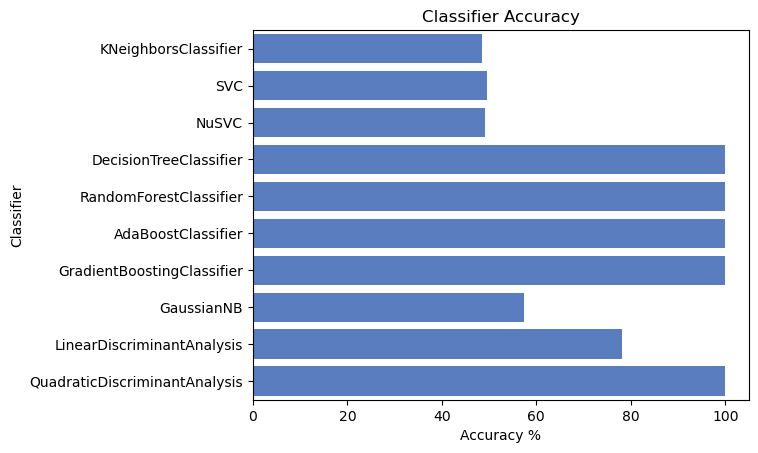

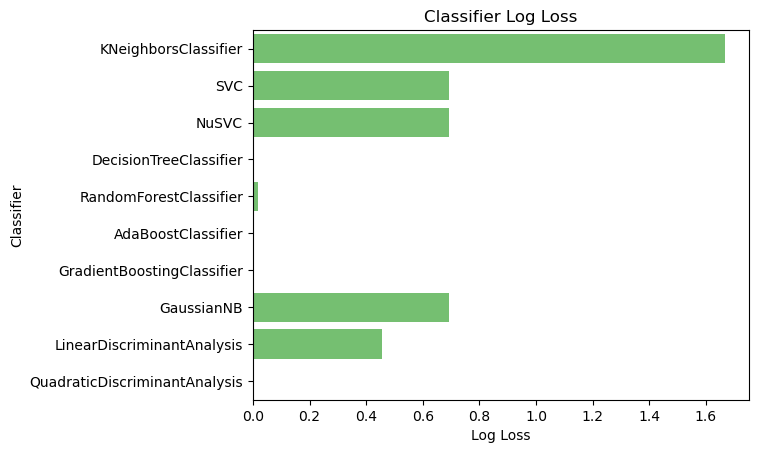

In [74]:
##Plots to visualize above results
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()